In [61]:
from datasets import load_dataset, load_metric
import pandas as pd
from datasets import Dataset, DatasetDict
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud


# EDA for Tamil Dataset - Tatoeba

## Load the Dataset

In [62]:
raw_dataset = load_dataset('csv', data_files='/kaggle/input/tatoeba/Tatoeba-tamil.csv', trust_remote_code=True)


In [63]:
limited_data = raw_dataset

In [64]:
limited_data

DatasetDict({
    train: Dataset({
        features: ['English', 'Tamil'],
        num_rows: 356
    })
})

In [65]:
# Create a new DatasetDict if needed
new_dataset_dict = DatasetDict({"train": limited_data["train"]})

# Verify the first example to ensure conversion was successful
print(new_dataset_dict["train"][0])

{'English': 'All of them went there.', 'Tamil': 'அவர்கள் எல்லோரும் அங்கே சென்றார்கள்'}


In [66]:
# Convert the dataset to a Pandas DataFrame
train_df = new_dataset_dict["train"].to_pandas()

# Display the first few rows to verify
train_df.head()

,English,Tamil
0,All of them went there.,அவர்கள் எல்லோரும் அங்கே சென்றார்கள்
1,All of us were silent.,நாங்கள் அனைவரும் அமைதியாக இருந்தோம்
2,Are you ready to go?,நீங்கள் போகத் தயாராக இருக்கிறீர்களா?
3,As all letters have the letter A for their fir...,அகர முதல எழுத்தெல்லாம் ஆதி பகவன் முதற்றே உலகு.
4,A square has four equal sides.,ஒரு சதுரத்திற்கு நான்கு சமமான பக்கங்கள் உள்ளன


## Check Unique and Null Values

In [67]:
train_df.describe()

,English,Tamil
count,356,356
unique,354,348
top,Please help.,மணி என்ன ஆகிறது?
freq,2,3


In [68]:
print(train_df.isnull().sum())


English    0
Tamil      0
dtype: int64


## Plot Sentence Lengths

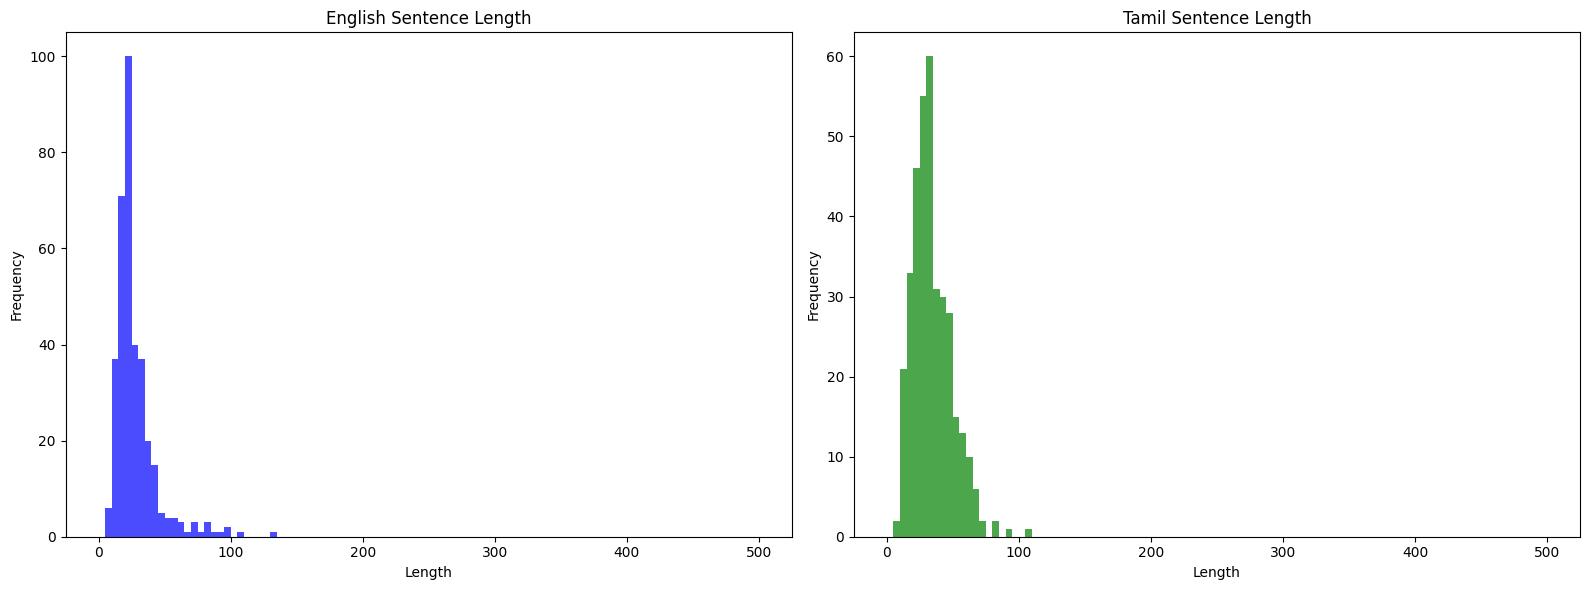

In [69]:
train_df['en_length'] = train_df['English'].apply(len)
train_df['ta_length'] = train_df['Tamil'].apply(len)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(train_df['en_length'], bins=100, range=(0, 500), color='blue', alpha=0.7)
plt.title('English Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(train_df['ta_length'], bins=100, range=(0, 500), color='green', alpha=0.7)
plt.title('Tamil Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



## Plot Correlation between English and Tamil Sentence Lengths

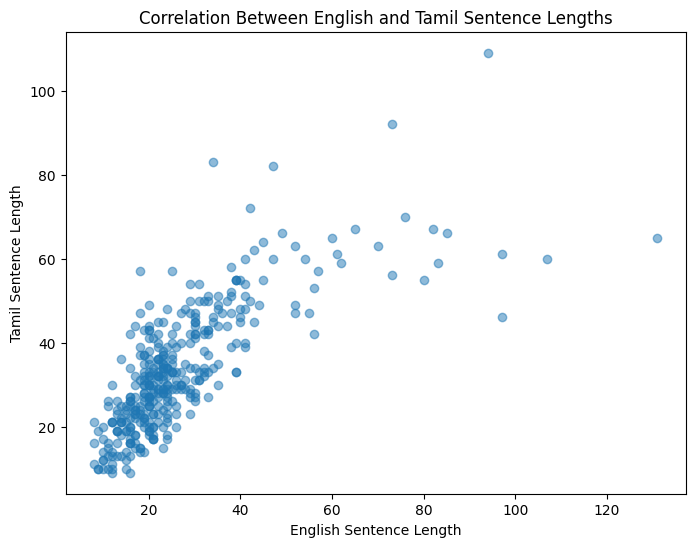

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(train_df['en_length'], train_df['ta_length'], alpha=0.5)
plt.title('Correlation Between English and Tamil Sentence Lengths')
plt.xlabel('English Sentence Length')
plt.ylabel('Tamil Sentence Length')
plt.show()


## Most Commonly Occuring Words

In [71]:
import pandas as pd

from collections import Counter

en_words = ' '.join(train_df['English']).split()
ta_words = ' '.join(train_df['Tamil']).split()

en_word_freq = Counter(en_words)
ta_word_freq = Counter(ta_words)

# Most common English words
en_common_words = en_word_freq.most_common(10)
ta_common_words = ta_word_freq.most_common(10)

# Create DataFrames for better presentation
en_df = pd.DataFrame(en_common_words, columns=['Word', 'Frequency'])
ta_df = pd.DataFrame(ta_common_words, columns=['Word', 'Frequency'])

print("Most Common English Words:")
print(en_df)

print("\nMost Common Tamil Words:")
print(ta_df)


Most Common English Words:
  Word  Frequency
0   to         86
1    I         86
2  the         57
3   of         46
4   is         43
5   He         35
6  you         32
7    a         29
8  Tom         25
9  She         24

Most Common Tamil Words:
       Word  Frequency
0      நான்         69
1      அவன்         28
2      அவள்         26
3       ஒரு         21
4        நீ         18
5       வழி         16
6     என்று         14
7      என்ன         14
8      டோம்         14
9  அவனுக்கு         12


## Size of the Vocabulary

In [72]:
en_vocab_size = len(set(' '.join(train_df['English']).split()))
ta_vocab_size = len(set(' '.join(train_df['Tamil']).split()))

print(f'English Vocabulary Size: {en_vocab_size}')
print(f'Tamil Vocabulary Size: {ta_vocab_size}')


English Vocabulary Size: 795
Tamil Vocabulary Size: 937


## Check Duplicate Rows

In [73]:
duplicate_rows = train_df[train_df.duplicated(['English', 'Tamil'])]
print(f'Number of duplicate rows: {len(duplicate_rows)}')


Number of duplicate rows: 0


# EDA for Telugu Dataset - Tatoeba

## Load the Dataset

In [74]:
raw_dataset = load_dataset('csv', data_files='/kaggle/input/tatoeba/Tatoeba-telugu.csv', trust_remote_code=True)


In [75]:
limited_data = raw_dataset

In [76]:
limited_data

DatasetDict({
    train: Dataset({
        features: ['English', 'Telugu'],
        num_rows: 262
    })
})

In [77]:
# Create a new DatasetDict if needed
new_dataset_dict = DatasetDict({"train": limited_data["train"]})

# Verify the first example to ensure conversion was successful
print(new_dataset_dict["train"][0])

{'English': 'A cat came out from under the desk.', 'Telugu': 'ఒక పిల్లి డెస్క్ కింద నుండి బయటకు వచ్చింది.'}


In [78]:
# Convert the dataset to a Pandas DataFrame
telugu_df = new_dataset_dict["train"].to_pandas()

# Display the first few rows to verify
telugu_df.head()

,English,Telugu
0,A cat came out from under the desk.,ఒక పిల్లి డెస్క్ కింద నుండి బయటకు వచ్చింది.
1,Ah! How beautiful the Taj Mahal is!,ఆహా! తాజ్ మహల్ ఎంత బాగుంది!
2,Ah! How serene is this temple!,ఆహా! ఈ గుడి ఎంత ప్రశాంతంగా ఉంది!
3,Are you feeling OK?,వొంట్లో ఎలా వుంది
4,Are you for real?!,ఎమిటీ! ఇది నిజమా?


## Check Unique and Null Values

In [79]:
telugu_df.describe()

,English,Telugu
count,262,262
unique,259,249
top,What did you talk about?,హోమ్‌వర్క్ చేశావా ?
freq,2,5


In [80]:
print(telugu_df.isnull().sum())

English    0
Telugu     0
dtype: int64


## Plot Sentence Lengths

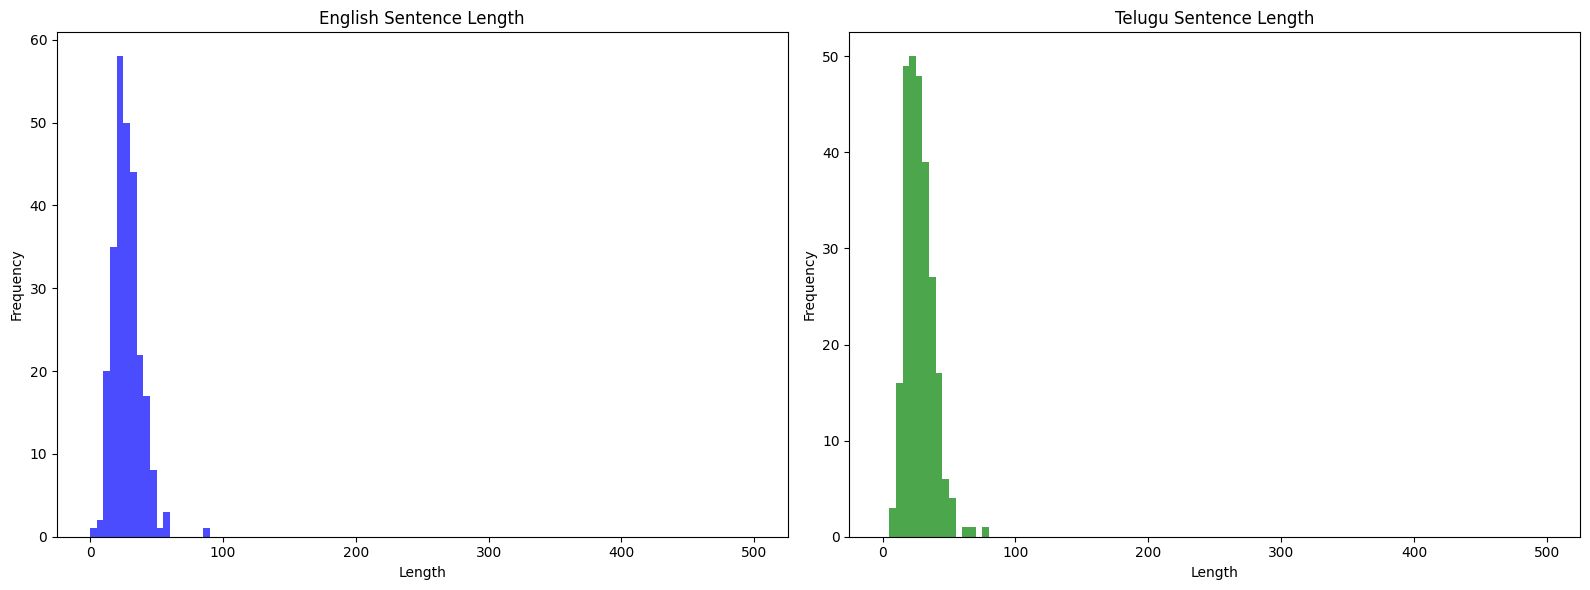

In [81]:
telugu_df['en_length'] = telugu_df['English'].apply(len)
telugu_df['te_length'] = telugu_df['Telugu'].apply(len)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(telugu_df['en_length'], bins=100, range=(0, 500), color='blue', alpha=0.7)
plt.title('English Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(telugu_df['te_length'], bins=100, range=(0, 500), color='green', alpha=0.7)
plt.title('Telugu Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



## Plot Correlation between English and Telugu Sentences

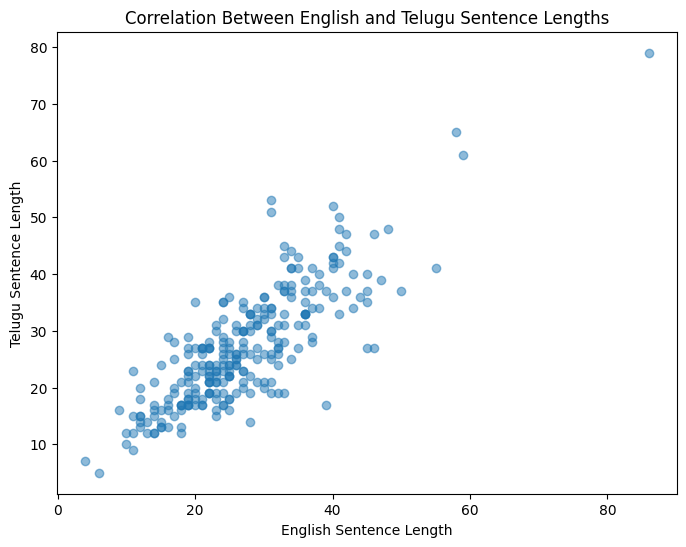

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(telugu_df['en_length'], telugu_df['te_length'], alpha=0.5)
plt.title('Correlation Between English and Telugu Sentence Lengths')
plt.xlabel('English Sentence Length')
plt.ylabel('Telugu Sentence Length')
plt.show()


## Most Commonly Occuring Words

In [83]:
import pandas as pd

from collections import Counter

en_words = ' '.join(telugu_df['English']).split()
te_words = ' '.join(telugu_df['Telugu']).split()

en_word_freq = Counter(en_words)
te_word_freq = Counter(te_words)

# Most common English words
en_common_words = en_word_freq.most_common(10)
te_common_words = te_word_freq.most_common(10)

# Create DataFrames for better presentation
en_df = pd.DataFrame(en_common_words, columns=['Word', 'Frequency'])
te_df = pd.DataFrame(te_common_words, columns=['Word', 'Frequency'])

print("Most Common English Words:")
print(en_df)

print("\nMost Common Telugu Words:")
print(te_df)


Most Common English Words:
   Word  Frequency
0   you         50
1    to         41
2   the         34
3     I         31
4    is         27
5     a         20
6   are         15
7  this         14
8    He         13
9  your         12

Most Common Telugu Words:
     Word  Frequency
0       ?         40
1  నువ్వు         26
2    నేను         20
3     ఇది         15
4    నాకు         14
5     అది         13
6       ఈ         11
7      నా         10
8      ఒక          9
9    నీకు          9


## Size of the Vocabulary

In [84]:
en_vocab_size = len(set(' '.join(telugu_df['English']).split()))
te_vocab_size = len(set(' '.join(telugu_df['Telugu']).split()))

print(f'English Vocabulary Size: {en_vocab_size}')
print(f'Telugu Vocabulary Size: {te_vocab_size}')


English Vocabulary Size: 687
Telugu Vocabulary Size: 660


## Check Duplicate Rows

In [85]:
duplicate_rows = telugu_df[telugu_df.duplicated(['English', 'Telugu'])]
print(f'Number of duplicate rows: {len(duplicate_rows)}')


Number of duplicate rows: 0


# EDA for Hindi Dataset - Tatoeba

In [86]:
raw_dataset = load_dataset('csv', data_files='/kaggle/input/tatoeba/Tatoeba-Challenge.csv', trust_remote_code=True)


In [87]:
limited_data = raw_dataset

In [88]:
limited_data

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'English', 'Hindi'],
        num_rows: 5000
    })
})

In [89]:
# Create a new DatasetDict if needed
new_dataset_dict = DatasetDict({"train": limited_data["train"]})

# Verify the first example to ensure conversion was successful
print(new_dataset_dict["train"][0])

{'Unnamed: 0': 0, 'English': "A baby is God's opinion that the world should go on.", 'Hindi': 'नन्हे शिशु के जन्म का अर्थ है कि भगवान यह चाहते हैं कि यह दुनिया बनी रहे।'}


In [90]:
# Convert the dataset to a Pandas DataFrame
# Convert the dataset to a Pandas DataFrame
hindi_df = new_dataset_dict["train"].to_pandas()

# Drop the "Unnamed: 0" and "number" columns
hindi_df = hindi_df.drop(columns=["Unnamed: 0"])

# Display the first few rows to verify
print(hindi_df.head())

                                             English  \
0  A baby is God's opinion that the world should ...   
1          Absence of rain caused the plants to die.   
2                 A button has come off my raincoat.   
3                           A cat ran after a mouse.   
4                             A clock has two hands.   

                                               Hindi  
0  नन्हे शिशु के जन्म का अर्थ है कि भगवान यह चाहत...  
1                          पौधे बारिश के बिना मर गए।  
2                 मेरे रेनकोट से एक बटन निकल आया है।  
3                       एक बिल्ली चूहे के पीछे भागी।  
4                           घड़ी के दो हाथ होते हैं.  


## Check Unique and Null Values

In [91]:
hindi_df.describe()

,English,Hindi
count,5000,5000
unique,4401,4912
top,You know him.,वह उसका घर है।
freq,8,3


In [92]:
print(hindi_df.isnull().sum())

English    0
Hindi      0
dtype: int64


## Plot Sentences Lengths

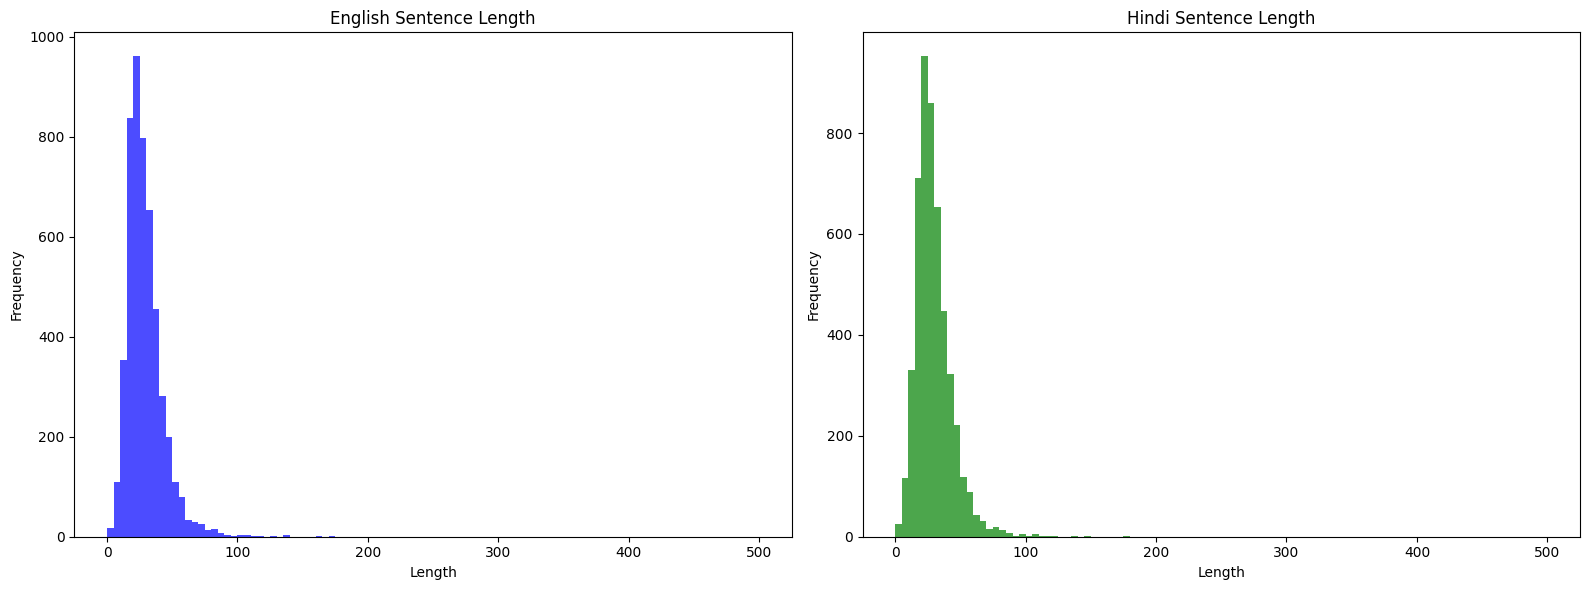

In [93]:
hindi_df['en_length'] = hindi_df['English'].apply(len)
hindi_df['hi_length'] = hindi_df['Hindi'].apply(len)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(hindi_df['en_length'], bins=100, range=(0, 500), color='blue', alpha=0.7)
plt.title('English Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(hindi_df['hi_length'], bins=100, range=(0, 500), color='green', alpha=0.7)
plt.title('Hindi Sentence Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



## Plot Correlation between English and Hindi Sentences

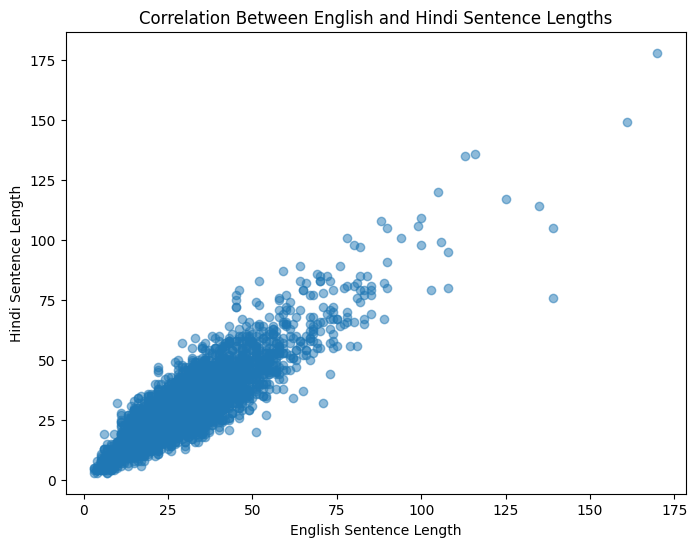

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(hindi_df['en_length'], hindi_df['hi_length'], alpha=0.5)
plt.title('Correlation Between English and Hindi Sentence Lengths')
plt.xlabel('English Sentence Length')
plt.ylabel('Hindi Sentence Length')
plt.show()


## Most Commonly Occuring Words

In [95]:
import pandas as pd

from collections import Counter

en_words = ' '.join(hindi_df['English']).split()
hi_words = ' '.join(hindi_df['Hindi']).split()

en_word_freq = Counter(en_words)
hi_word_freq = Counter(hi_words)

# Most common English words
en_common_words = en_word_freq.most_common(10)
hi_common_words = hi_word_freq.most_common(10)

# Create DataFrames for better presentation
en_df = pd.DataFrame(en_common_words, columns=['Word', 'Frequency'])
hi_df = pd.DataFrame(hi_common_words, columns=['Word', 'Frequency'])

print("Most Common English Words:")
print(en_df)

print("\nMost Common Hindi Words:")
print(hi_df)


Most Common English Words:
  Word  Frequency
0    I        855
1  the        809
2   is        805
3   to        715
4    a        628
5  you        562
6   in        429
7   of        380
8  Tom        373
9  The        279

Most Common Hindi Words:
   Word  Frequency
0   है।       1218
1   में        670
2   मैं        644
3  नहीं        596
4   टॉम        485
5    से        461
6    के        454
7    वह        454
8  हैं।        432
9    को        409


## Size of the Vocabulary

In [96]:
en_vocab_size = len(set(' '.join(hindi_df['English']).split()))
hi_vocab_size = len(set(' '.join(hindi_df['Hindi']).split()))

print(f'English Vocabulary Size: {en_vocab_size}')
print(f'Hindi Vocabulary Size: {hi_vocab_size}')


English Vocabulary Size: 5199
Hindi Vocabulary Size: 4990


## Check Duplicate Rows

In [97]:
duplicate_rows = hindi_df[hindi_df.duplicated(['English', 'Hindi'])]
print(f'Number of duplicate rows: {len(duplicate_rows)}')


Number of duplicate rows: 0
